Wahlpflichtfach Künstliche Intelligenz I: Testat

---

# 02 - Testat zu Scikit-learn (sklearn)
__Gruppennummer:__ 3

__Mitglieder:__
- Joel Daumann
- Joris Schlüter
- Tom Ramos
- Jonah Gerdes
- Marvin Denecke

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In diesem Testat werden Sie die unterschiedlichen Arbeitsschritte von der Datenvorverarbeitung über die Modell- und Teststrategieauswahl bis hin zur Evaluierung mit Hilfe von Scikit-learn durchführen. Dabei verwenden wir eine leicht modifizierte Variante des [California Housing Datasets](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Dieses enthält die folgenden _acht_ Merkmale:
- __MedInc:__ Das mittlere Einkommen im Block
- __HouseAge:__ Das mittlere Hausalter im Block
- __AveRooms:__ Die durchschnittliche Raumanzahl pro Haushalt im Block
- __AveBedrms:__ Die durchschnittliche Schlafzimmeranzahl pro Haushalt im Block
- __Population:__ Die Bevölkerunganzahl im Block
- __AveOccup:__ Die durchschnittliche Anzahl von Personen pro Haushalt im Block
- __Latitude:__ Der Breitengrad des Blocks
- __Longitude:__ Der Längengrad des Blocks

Jedem Datenpunkt ist genau einer Klasse (_low_, _mid-low_, _mid_, _mid-high_, _high_) zugeordnet, die angibt, wie hoch der mittlere Hauswert im Block ist. Jede Klasse enthält ~20% der Datenpunkte.

## Aufgabe 0 - Data Understanding
__unbenotet__

Laden Sie die Daten und machen Sie sich mit ihnen vertraut. 

In [2]:
housing_df = pd.read_csv('california_housing_data.csv')
housing_df

# Anzahl der NAs ggf. für die Strategie interessant
housing_df.isna().sum()

MedInc        47
HouseAge      48
AveRooms      45
AveBedrms     38
Population    40
AveOccup      38
Latitude      39
Longitude     39
Label          0
dtype: int64

Eventuell hilft Ihnen auch der folgende Graph.

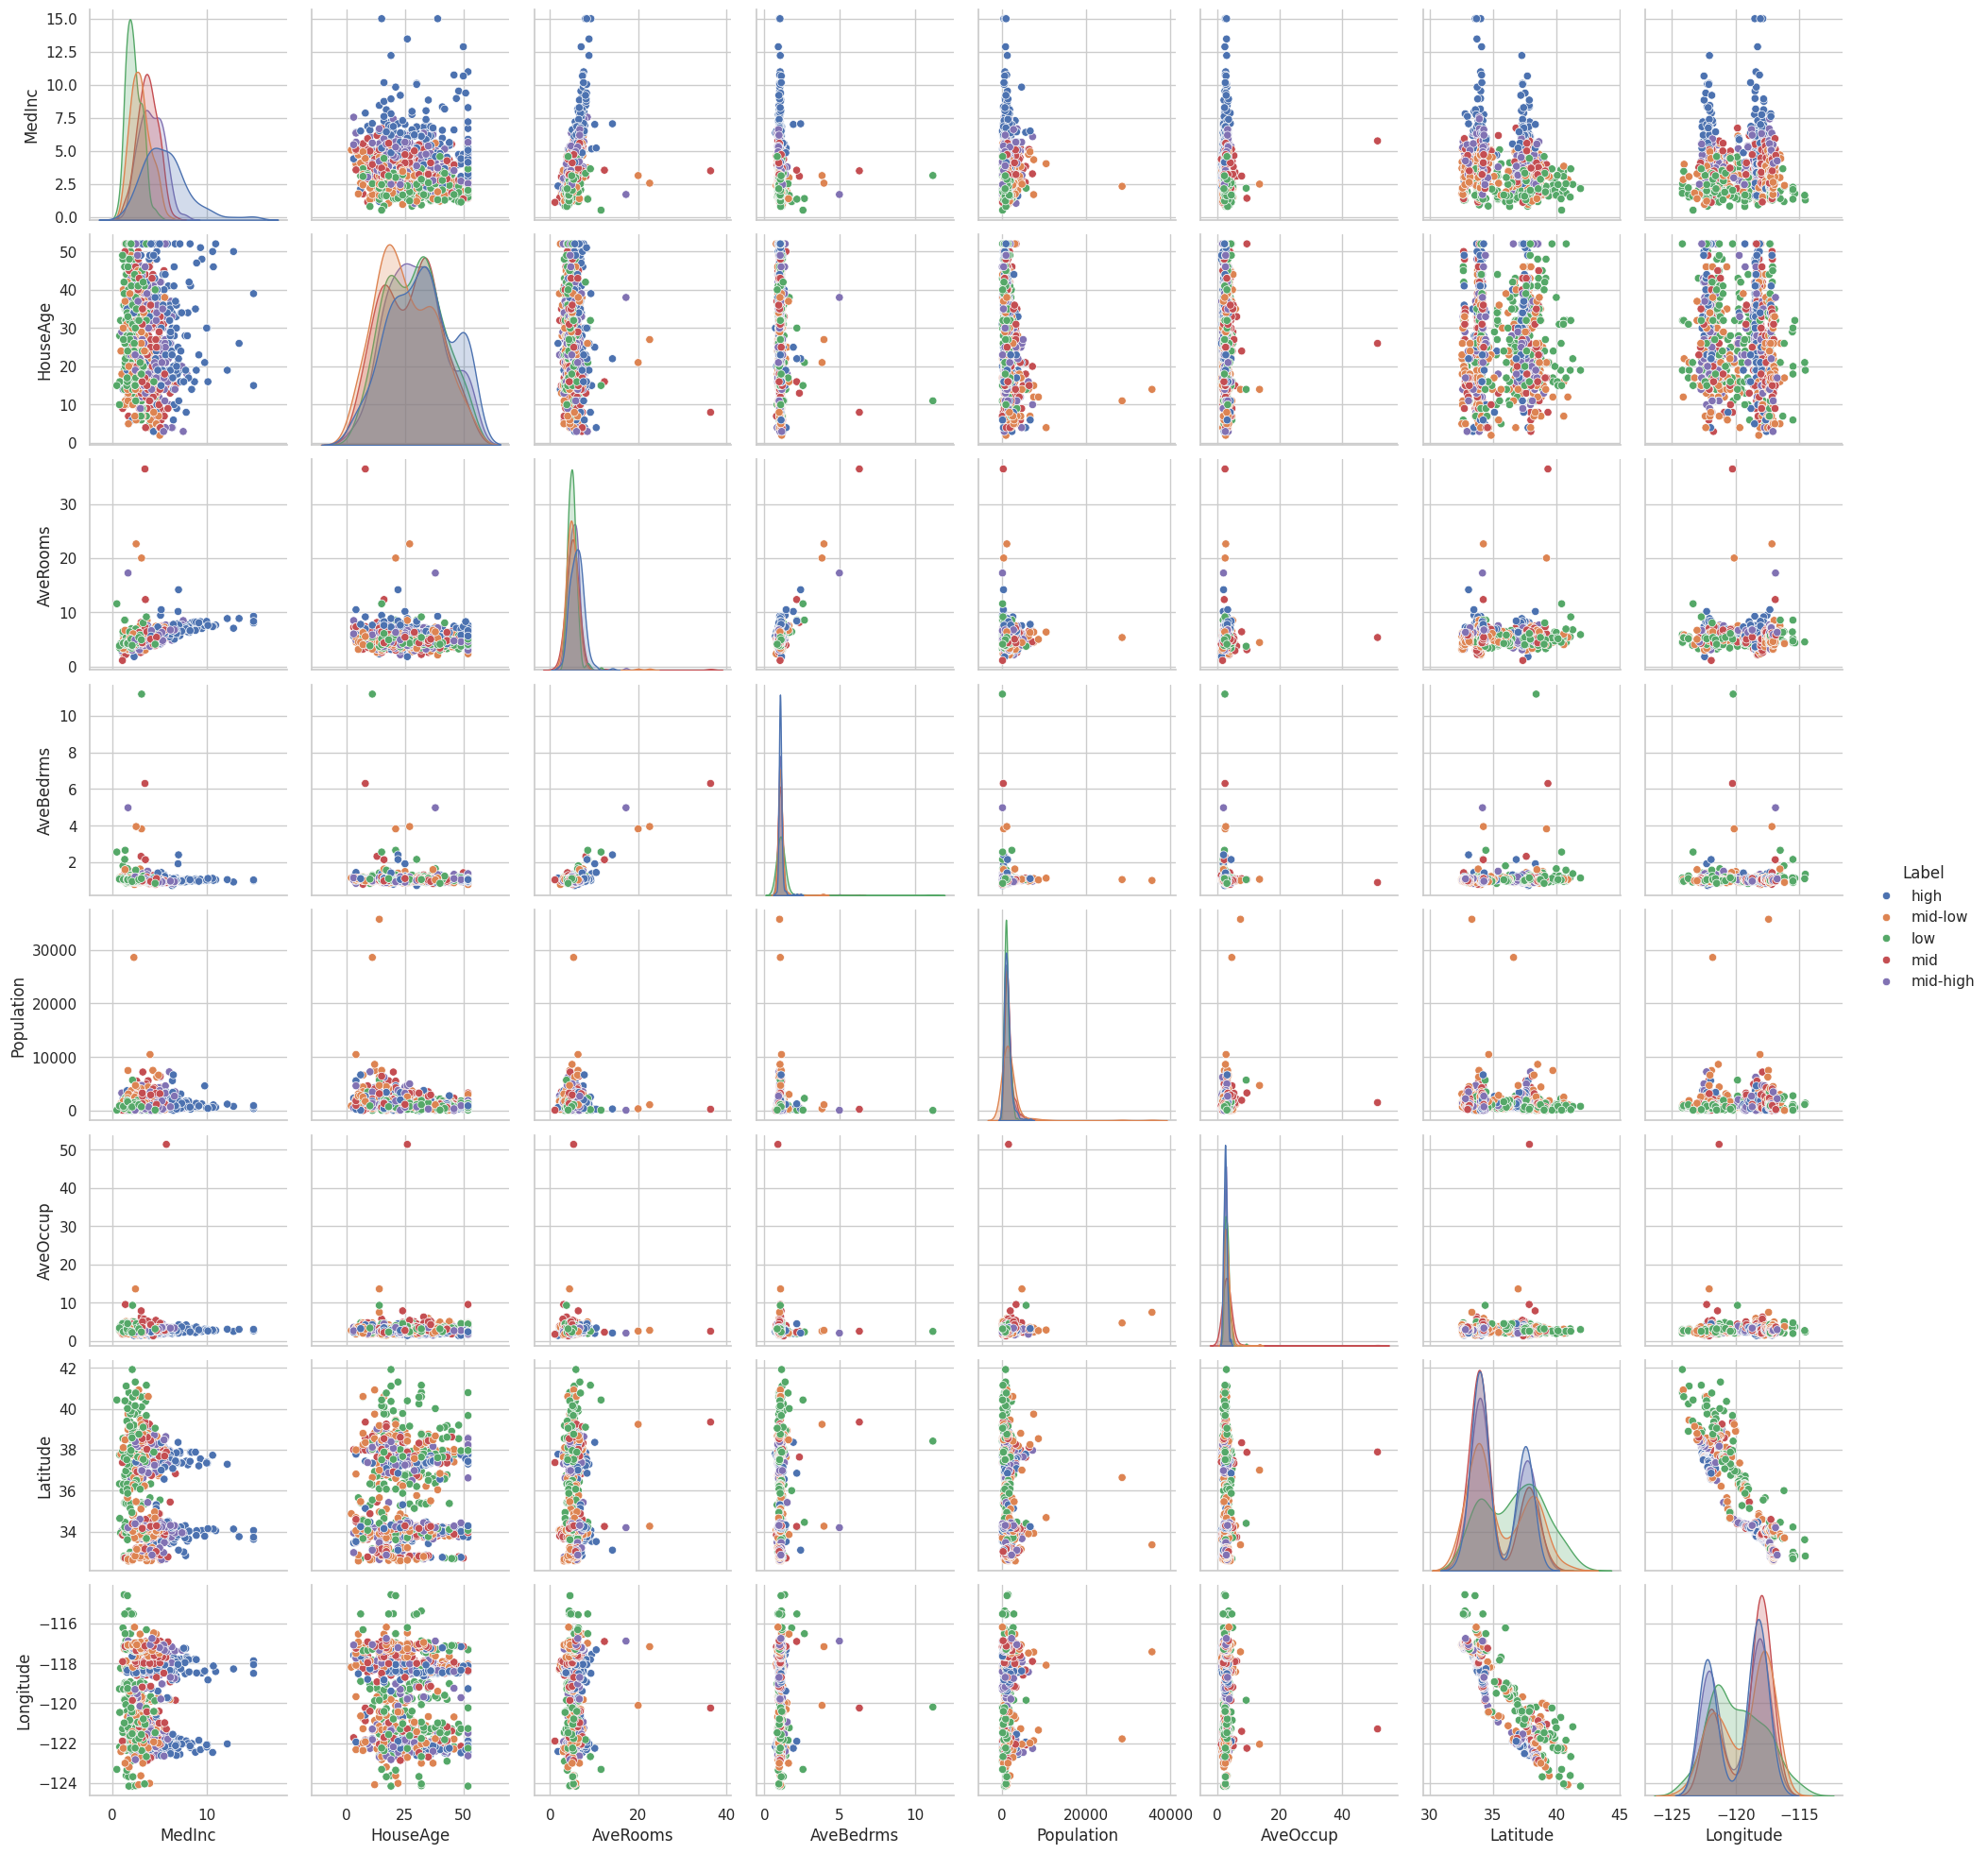

In [3]:
sns.set_theme(style="whitegrid")
sns.pairplot(housing_df, hue="Label")

## Aufgabe 1 - Data Preparation (4 Punkte)
Die erste Aufgabe ist es den Datensatz fürs maschinelle Lernen vorzubereiten. Dazu sind die folgenden Schritte nötig:
- a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
- b) Auswahl der Strategie(n) zur Skalierung der Daten
- c) Erstellen der Preparation-Pipeline

Da das Ersetzen der fehlenden Werte und die Skalierung der Daten in einer `Pipeline` passieren soll, können Sie nur Algorithmen verwenden, die __sklearn__ bereitstellt.

_Hinweise/Tipps:_ 
- Sie müssen die unterschiedlichen Algorithmen nicht (bis zum Maximum) optimieren, hier geht es gerade eher darum zu überprüfen, ob Sie die Algorithmen generell verstanden haben und Sie richtig einsetzen/kombinieren können.
- Gucken Sie sich nochmal die besprochenen Algorithmen an und überlegen wo die Stärken und Schwächen liegen.
- Sie können selbstverständlich auch unterschiedliche Methoden für die einzelnen Merkmale wählen.  

### a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
_Punkte: 1_

Als erstes müssen Sie sich eine Strategie zum Ersetzen der fehlenden Werte überlegen. Beschreiben Sie diese in der nachfolgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie gewählt haben. 

__Ihre Antwort:__ <br>

MedInc, Population, AveOccup -> kontinulierliche Werte, normalisierte Verteilung -> Median-Imputation, weil sie robust gegenüber Ausreißern ist <br>

AveRooms, AveBedrms -> liegen meist in engen Bereichen, aber Ausreißer möglich -> Median- oder KNN-Imputation (letzteres, wenn genügend Datenpunkte vorhanden sind), weil benachbarte Beobachtungen (ähnliche Lage, ähnliche Haushaltsgrößen) realistischere Werte liefern. <br>

Latitude, Longitude -> hochwertig, da die Lage für den Hauswert entscheidend ist -> Fehler sind besonders kritisch -> KNN-Imputation basierend auf ähnlichen Häusern in der selben Region -> Wenn zu viele Werte fehlen ist es sinnvoll die Zeilen lieber zu löschen, da sich an Geodaten schwer angenährt werden kann. <br>

HouseAge -> diskrete, aber kontinuierliche Zahlenwerte -> Median- oder KNN-Imputation bei ausreichend Datenpunkten <br>

MICE (Multiple Imputation by Chained Equations) / IterativImputer schätzt fehlende Werte durch Modelle auf Basis anderer Features. -> Kann zu Overfitting führen, da vorhandene Beziehungen der Features fälschlich verstärkt. Das kann später dazu führen, dass das Modell zwar auf die Trainingsdaten perfekt abgestimmt ist, aber schlecht mit neuen Daten funktioniert.


### b) Auswahl der Strategie(n) zur Skalierung der Daten
_Punkte: 1_

Außerdem sollten die Daten skaliert/normalisiert werden. Beschreiben Sie Ihre Strategie und begründen Sie warum Sie diese Strategie bzw. Methoden gewählt haben.

__Ihre Antwort:__ <br>

MedInc, AveRooms, Population, AveOccup enthalten oft starke Ausreißer -> RobustScaler, da dieser stabiler mit Ausreißern funktioniert als der StandardScaler. <br>

Latitude, Longitude sind eher gleichmäßig verteilt -> daher nehmen wir hier den StandardScaler. <br>

HouseAge, AveBedrms sind moderat verteilt -> StandardScaler ist ausreichend. Ausreißer eher selten.

### c) Erstellen der Preparation-Pipeline
_Punkte: 2_

In der nächsten Codezeile können Sie nun die `preparation_pipeline` erstellen. In dieser sollen beide vorherigen Schritte enthalten sein. Sie müssen die Pipeline aber noch nicht "trainieren" (Aufruf der Methode `fit()`).

In [37]:
from sklearn.pipeline import Pipeline 
# Hier können Sie die weiteren benötigten Imports hinzufügen
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

### BEGIN SOLUTION
# median_impute_features = ["MedInc", "Population", "AveOccup", "AveRooms", "AveBedrms", "HouseAge"]
# knn_impute_features = ["Latitude", "Longitude"]

# robust_scaler_features = ["MedInc", "AveRooms", "Population", "AveOccup"]
# standard_scaler_features = ["Latitude", "Longitude", "HouseAge", "AveBedrms"]

group_robust = ["MedInc", "Population", "AveOccup", "AveRooms"]
group_knn = ["Latitude", "Longitude"]
group_standard = ["HouseAge", "AveBedrms"]

pipeline_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

pipeline_knn = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

pipeline_standard = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

transformer = ColumnTransformer([
    ('robust', pipeline_robust, group_robust),
    ('knn', pipeline_knn, group_knn),
    ('standard', pipeline_standard, group_standard)
])

preparation_pipeline = Pipeline([('transformer', transformer)]) # IHRE LÖSUNG HIER
preparation_pipeline
### END SOLUTION

,steps,"[('transformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('knn', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Warum macht es noch keinen Sinn die Pipeline jetzt schon zu trainieren?

__Ihre Antwort:__ <br>

Es macht noch keine Sinn die Pipeline zu training, weil noch nicht in Trainungs- und Testdaten unterschieden wurde und es so zu Dataleakage kommen kann.

## Aufgabe 2 - Trainingsvorbereitung und Modellauswahl  (4 Punkte)
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
- a) Erstellen des Test- und Trainingsdatenset
- b) Kreuzvalidierung im Trainingsprozess
- c) Optimieren eines ML-Algorithmus
- d) Testen der trainierten Pipeline

### a) Erstellen des Test- und Trainingsdatenset
_Punkte: 0,5_

Zuerst benötigen wir ein Test- und ein Trainingsdatenset. Das Testdatenset soll 30% der gesamten Daten enthalten. 

In [38]:
# get the data and target from the data frame 
data = housing_df.loc[:, :'Longitude']
target = housing_df['Label']

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
# IHRE LÖSUNG HIER
train_data = None
test_data = None
train_label = None
test_label = None
train_data, test_data, train_label, test_label = train_test_split(data, target, test_size=0.3)
### END SOLUTION

### b) Kreuzvalidierung im Trainingsprozess
_Punkte: 1_

Was ist unter Kreuzvalidierung im Trainingsprozess zu verstehen und wieso wird es verwendet?

__Ihre Antwort:__ <br>

Unter der Kreuzvalidierung im Trainingsprozess ist zu verstehen, dass der Trainingssatz während des Trainings in k Sätze aufgeteilt. Der Algorithmus wird dann k-mal auf k-1 Sätzen trainiert. Die Bewertung des Modells erfolgt schließlich auf dem k-ten Satz. Das hat den Vorteil, dass der Datensatz zu Trainings- und Testdatensatz nicht noch in einen weiteren Teil (Validierungsdatensatz) aufgeteilt werden muss. <br>
Dabei wird die Kreuzvalidierung vorallem dafür verwendet, um sicherzustellen, dass die Performance nicht zufällig durch die Aufteilung in Trainings- und Testdaten verzerrt wird.

### c) Optimieren eines ML-Algorithmus
_Punkte: 1,5_

Im nächsten Schritt optimieren wir einen ML-Algorithmus. Da wir ein Klassifikationsproblem lösen wollen, kommen nur Klassifikationsalgorithmen als mögliche Algorithmen in Frage. Wir werden den [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) verwenden. 

Der `RandomForestClassifier` soll eine maximale Tiefe von 6 haben und maximal 75% der Daten pro Baum verwenden. Setzen Sie den `random_state` auf 0. Für die Anzahl der Bäume sollen die folgenden Werte überprüft werden: `[30, 40, 50, 60, 70, 80]`. Außerdem sollen die beiden Möglichkeiten `['gini', 'entropy']` für das Kriterium, nach dem geteilt wird, getestet werden.

Führen Sie die folgenden Schritte durch:
- Erstellen Sie eine Pipeline, die zuerst die vorher bereits erstellte Vorverarbeitung durchführt und anschließend den `RandomForestClassifier` aufruft. 
- Finden Sie die optimalen Parameter aus den angegebenen Parameterbereichen.
- Speichern Sie die `Pipeline` mit den besten Parametern in der Variable `trained_pipeline`
- Geben Sie die beste `Pipeline` aus

In [ ]:
# Hier können Sie weitere benötigte Importe hinzufügen
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
ml_pipeline = make_pipeline(preparation_pipeline, RandomForestClassifier(max_depth=6, max_samples=0.75, random_state=0))

# Parameter-Grid mit den zu testenden Werten
param_grid = {
    'randomforestclassifier__n_estimators': [30, 40, 50, 60, 70, 80],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# GridSearchCV mit der Pipeline und dem Parameter-Grid
grid_search = GridSearchCV(
    estimator = ml_pipeline, 
    param_grid=param_grid,
    n_jobs=-1
)

grid_search.fit(train_data, train_label)

print("Beste Parameter:", grid_search.best_params_)
print("Bester Score:", grid_search.best_score_)
trained_pipeline = grid_search.best_estimator_
trained_pipeline
### END SOLUTION

Beste Parameter: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 80}
Bester Score: 0.5374425287356323


,steps,"[('pipeline', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('transformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...), ('knn', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3


### d) Testen der trainierten Pipeline
_Punkte: 1_

Nachdem Sie die `Pipeline` trainiert haben, ist es nun Zeit diese zu testen. Lassen Sie sich dafür den Score einmal für das Test- und einmal für das Trainingsdatenset berechnen. Was fällt auf? Welche Metrik wird für das berechnen verwendet bzw. was sagt sie aus? Ist diese Metrik hier sinnvoll?

In [44]:
### BEGIN SOLUTION
# IHRE LÖSUNG HIER
test_score = trained_pipeline.score(test_data, test_label)
training_score = trained_pipeline.score(train_data, train_label)
print("Test Score:", test_score)
print("Training Score:", training_score)
### END SOLUTION

Test Score: 0.5096774193548387
Training Score: 0.8296398891966759


__Ihre Antwort:__ <br>

Was fällt auf? <br>
Testscore und Trainingsscore liegen weit auseinander. <br>

Welche Metrik und was sagt die Metrik aus? <br>
Standardmäßig wird die  Accuracy als Metrik verwendet.<br>
Diese sagt aus, welcher Anteil an allen Vorhersagen richtig war. <br>

Ist die Metrik hier sinnvoll? <br>
Ja, diese ist hier sinnvoll, da unsere Daten gleichverteilt gelabelt sind.


## Aufgabe 3 - Weitere Evaluierung und Visualisierung (2 Punkte)
Im letzten Schritt wollen wir uns die Ergebnisse noch einmal genauer angucken, um eventuell zu verstehen, was passiert ist. Dazu sind die folgenden Teilaufgaben zu erledigen:
- a) Erstellen eines Confusion Matrix-Diagramms
- b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis

### a) Erstellen eines Confusion Matrix-Diagramms
_Punkte: 1_

Erstellen Sie mit Hilfe der `ConfusionMatrixDisplay`-Funktion das Diagramm der Confusion Matrix. Analysieren Sie dieses anschließend.

_Tipps:_
- Welche Klassen wurden falsch klassifiziert?
- Was könnten mögliche Gründe dafür sein?

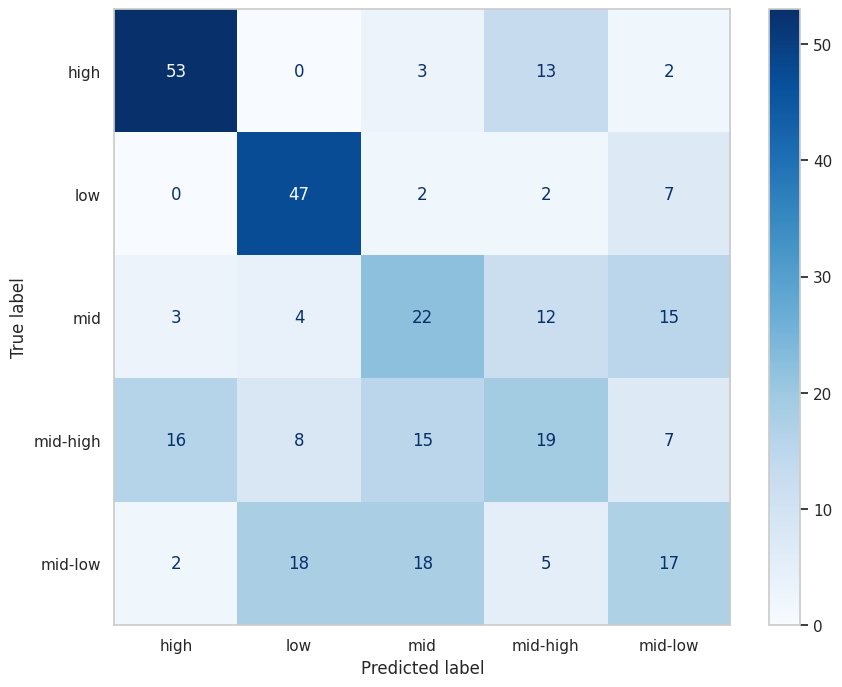

In [49]:

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, figsize=(10, 8))
_ = ConfusionMatrixDisplay.from_estimator(
    trained_pipeline, 
    test_data, 
    test_label,
    cmap=plt.cm.Blues,
    ax=ax
)
ax.grid(False)
### END SOLUTION

__Ihre Antwort:__ <br>

Es wurden alle falsch klassifiziert, die nicht auf der Diagonalen von links oben nach rechts unten liegen. <br>
Da die Daten von mid-low, mid und mid-high alle sehr nah bei einander liegen, ist es schwer, diese zu unterscheiden. <br>
Die geschätzten Werte könnten zu falschen Ergebnissen geführt haben.

### b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis
_Punkte: 1_

Zum Schluss wollen wir noch einmal analysieren welchen Einfluss der Parameter `n_estimators` auf das Trainingsergebnis hat. Verwenden Sie dafür die Funktion `validation_curve`, um für den getesteten Parameterbereich des Parameters die nötigen Daten zu sammeln. Speichern Sie die Rückgabe in den Variablen `train_scores` und `valid_score`. Erstellen Sie außerdem eine Variable `n_estimators`, die alle möglichen Werte für den Parameter enthält. 

Welche Rückschlüsse lässt das Diagramm zu?

In [ ]:
### BEGIN SOLUTION
# IHRE LÖSUNG HIER
from sklearn.model_selection import validation_curve

# Parameter-Range für die n_estimators
n_estimators = [30, 40, 50, 60, 70, 80]

train_scores, valid_scores = validation_curve(
    estimator=trained_pipeline,
    X=train_data,
    y=train_label,
    param_name="randomforestclassifier__n_estimators",
    param_range=n_estimators,
    cv=5,
    scoring="accuracy"
)


### END SOLUTION

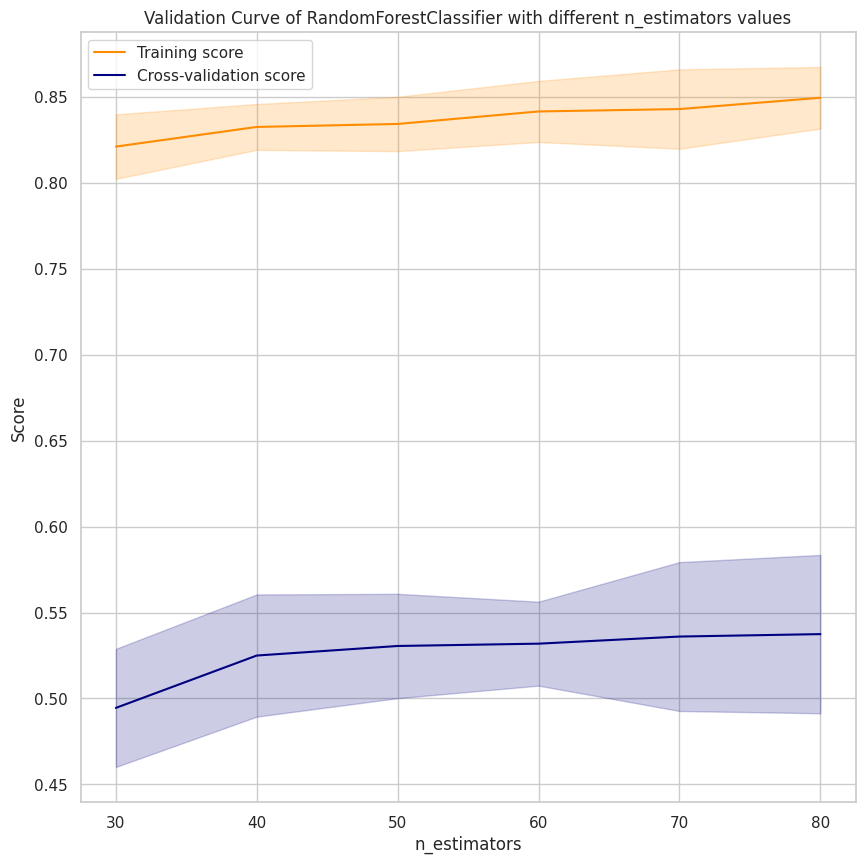

In [51]:
# first, calculate the means and standard deviations
train_scores_mean = train_scores.mean(axis=1)  # noqa: F821
train_scores_std = train_scores.std(axis=1)  # noqa: F821
valid_scores_mean = valid_scores.mean(axis=1)  # noqa: F821
valid_scores_std = valid_scores.std(axis=1)  # noqa: F821

# create the figure
plt.figure(figsize=(10, 10))
plt.title("Validation Curve of RandomForestClassifier with different n_estimators values")
plt.xlabel("n_estimators")
plt.ylabel("Score")
# plot the training score
plt.plot(n_estimators, train_scores_mean, label="Training score", color="darkorange")  # noqa: F821
plt.fill_between(
    n_estimators,   # noqa: F821
    train_scores_mean - train_scores_std, 
    train_scores_mean + train_scores_std, 
    color="darkorange",
    alpha=0.2
)
# plot the validation score
plt.plot(n_estimators, valid_scores_mean, label="Cross-validation score", color="navy")  # noqa: F821
plt.fill_between(
    n_estimators,  # noqa: F821
    valid_scores_mean - valid_scores_std,
    valid_scores_mean + valid_scores_std,
    color="navy",
    alpha=0.2
)

plt.legend(loc="best")
plt.show()

__Ihre Antwort:__ <br>

Das Diagramm lässt auf Overfitting schließen, weil Trainingsscore und Cross-Validation-Score weit auseinander liegen. Das Modell ist also zu komplex. <br>
Außerdem könnte auch die maximale Tiefe (max_depth) der Bäume zu hoch sein.<br>
Da zudem die Validierungskurve eher flach verläuft ist das Modell sehr robust gegenüber Änderungen im Hyperparameter. <br>

---

Wahlpflichtfach Künstliche Intelligenz I: Testat